# Module 2 Final Project

* Student name: Wendy Jiang
* Student pace: Full Time
* Scheduled project review date/time: Friday, April 12 1:00PM EST
* Instructor name: Brandon Lewis
* https://docs.google.com/presentation/d/1mzzwaPwyUodFfiLLxCxNZQ3-5Lgnmfysm9xH6NU45Mw/edit?usp=sharing

### We are conducting hypothesis tests and statistical analysis on data extracted from the Northwind database.

#### The schema for the company database is as follows:

<img src='Northwind_ERD.png'>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # significance levels, normality
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
# import sql libraries
import sqlite3
import sqlalchemy

from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session, sessionmaker

# # create a connection object that connects to the database in question
# conn = sqlite3.connect('Northwind_small.sqlite')
# # create a cursor object and use it to execute sql commands
# c = conn.cursor()

engine = create_engine('sqlite:///Northwind_small.sqlite', echo=True) #DSC 02.15: Querying with SQLAlchemy
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)

# Get names of tables in database
table_names = inspector.get_table_names()
table_names

2019-04-12 04:02:05,546 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-12 04:02:05,548 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:05,550 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-12 04:02:05,551 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:05,555 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-12 04:02:05,556 INFO sqlalchemy.engine.base.Engine ()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

In [3]:
# Get column names for a specific table - Category
inspector.get_columns('Category')

2019-04-12 04:02:05,575 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-12 04:02:05,578 INFO sqlalchemy.engine.base.Engine ()


[{'name': 'Id',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'CategoryName',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'Description',
  'type': VARCHAR(length=8000),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

## Connect to Database

In [4]:
con = engine.connect()
rs = con.execute('SELECT * FROM Category')
print(rs.fetchall())

2019-04-12 04:02:05,610 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2019-04-12 04:02:05,613 INFO sqlalchemy.engine.base.Engine ()
[(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales'), (2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings'), (3, 'Confections', 'Desserts, candies, and sweet breads'), (4, 'Dairy Products', 'Cheeses'), (5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal'), (6, 'Meat/Poultry', 'Prepared meats'), (7, 'Produce', 'Dried fruit and bean curd'), (8, 'Seafood', 'Seaweed and fish')]


Based on the schema, the most relevant table to create a separate dataframe from would be the 'OrderDetail' table.

In [5]:
OrderDetail_df = pd.read_sql_query('SELECT * FROM [OrderDetail]', engine)
OrderDetail_df.head(10)

2019-04-12 04:02:05,636 INFO sqlalchemy.engine.base.Engine SELECT * FROM [OrderDetail]
2019-04-12 04:02:05,637 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.00
1,10248/42,10248,42,9.8,10,0.00
2,10248/72,10248,72,34.8,5,0.00
3,10249/14,10249,14,18.6,9,0.00
4,10249/51,10249,51,42.4,40,0.00
5,10250/41,10250,41,7.7,10,0.00
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05


In [6]:
OrderDetail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [7]:
OrderDetail_df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [8]:
# check for null values
OrderDetail_df.isna().sum()

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

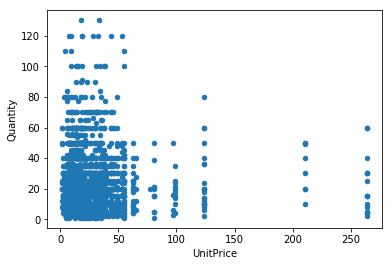

In [9]:
ax=OrderDetail_df.plot.scatter(x='UnitPrice', y='Quantity')

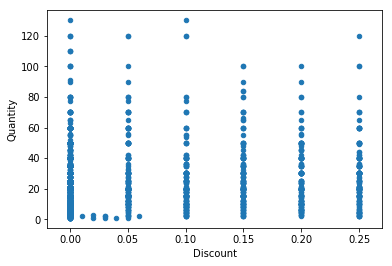

In [10]:
ax=OrderDetail_df.plot.scatter(x='Discount', y='Quantity')

The first question we need to answer:

## 1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

**Null Hypothesis:** There is no statistically significant difference between the quantity ordered of discounted vs. non-discounted products.

**Alternative Hypothesis:** There is a statistically significant difference between the quantity ordered of discounted vs. non-discounted products.

We can calculate the order price and discount price as follows, and include them in our dataframe.

In [11]:
# calculate order price and discount price
OrderDetail_df['FullPrice'] = OrderDetail_df.Quantity * OrderDetail_df.UnitPrice
OrderDetail_df['DiscountPrice'] = OrderDetail_df.FullPrice * (1-OrderDetail_df.Discount)
OrderDetail_df.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,FullPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.00,168.0,168.00
1,10248/42,10248,42,9.8,10,0.00,98.0,98.00
2,10248/72,10248,72,34.8,5,0.00,174.0,174.00
3,10249/14,10249,14,18.6,9,0.00,167.4,167.40
4,10249/51,10249,51,42.4,40,0.00,1696.0,1696.00
5,10250/41,10250,41,7.7,10,0.00,77.0,77.00
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.40
7,10250/65,10250,65,16.8,15,0.15,252.0,214.20
8,10251/22,10251,22,16.8,6,0.05,100.8,95.76
9,10251/57,10251,57,15.6,15,0.05,234.0,222.30


In [12]:
# import statsmodels to perform statistical analysis
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

There are two groups we need to account for from the data: discounts of 0 and discounts > 0.

In [13]:
# create two categories for t-test
disc_none=con.execute('SELECT quantity FROM OrderDetail WHERE discount = 0.').fetchall()
disc_all=con.execute('SELECT quantity FROM OrderDetail WHERE discount > 0.').fetchall()

2019-04-12 04:02:06,616 INFO sqlalchemy.engine.base.Engine SELECT quantity FROM OrderDetail WHERE discount = 0.
2019-04-12 04:02:06,619 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:06,625 INFO sqlalchemy.engine.base.Engine SELECT quantity FROM OrderDetail WHERE discount > 0.
2019-04-12 04:02:06,626 INFO sqlalchemy.engine.base.Engine ()


In [14]:
# Levene Test for testing normality of variances
stats.levene(disc_none, disc_all)

LeveneResult(statistic=array([14.8326717]), pvalue=array([0.00012091]))

In [15]:
# https://machinelearningmastery.com/effect-size-measures-in-python/
from numpy import std, mean, sqrt, var
def cohen_d(d1,d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return abs((u1 - u2) / s)

In [16]:
wtest, pval = stats.shapiro(disc_none)
print('wtest: {}, p-value: {}'.format(wtest, pval))
wtest, pval = stats.shapiro(disc_all)
print('wtest: {}, p-value: {}'.format(wtest, pval))

wtest: 0.8434571027755737, p-value: 3.803856556577728e-34
wtest: 0.8690301179885864, p-value: 6.88120409395894e-26


In [17]:
print(stats.ttest_ind(disc_none, disc_all, equal_var=False))
print("Cohen's d: ",cohen_d(np.array(disc_none),np.array(disc_all)))

Ttest_indResult(statistic=array([-6.23906914]), pvalue=array([5.65641429e-10]))
Cohen's d:  0.2862776476697576


**Interpreting Cohen's d (Effect Size)**

d = 0.2 small effect size

d = 0.5 medium effect size

d = 0.8 large effect size



**Conclusion**: The t-test indicates a low p-value. From this we accept the alternative hypothesis that there is a statistically significant difference in the quantity ordered of discounted vs. non-discounted products.
We reject the null hypothesis since the discounts **do** have a statistically significant impact on quantity purchased, regardless of the size of the discount (effect size).

Now we can continue futher analysis on the impact of different levels of discounts offered.

In [124]:
df = OrderDetail_df
disc = df.Discount.unique()
disc

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [125]:
vals = [0, 15, 20, 25, 10]
vals.sort(reverse=False)
vals
keys = ['{}%'.format(val) for val in vals]

In [126]:
discounts = dict()
for key, val in zip(keys, vals):
    discounts[key] = None
    ddf = df.Quantity[df.Discount==0.01*val]
    discounts[key] = ddf
discounts['all'] = df.Quantity[df.Discount > 0.00]
discounts['small'] = df.Quantity[(df.Discount> 0.00) & (df.Discount < 0.10)]

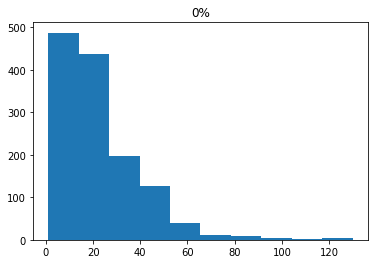

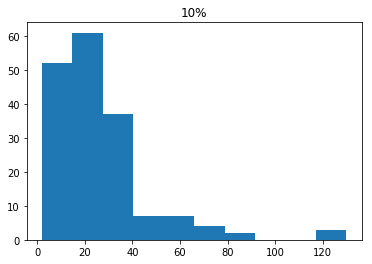

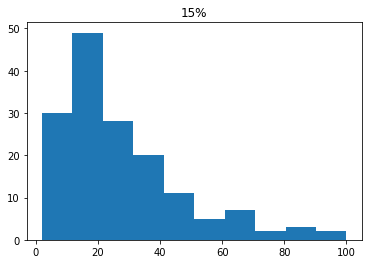

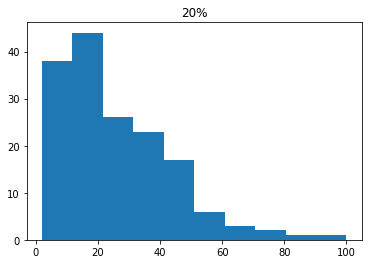

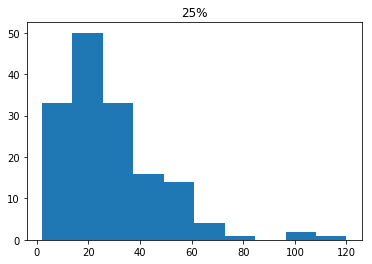

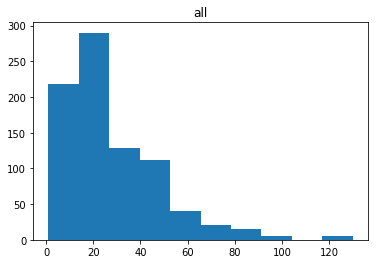

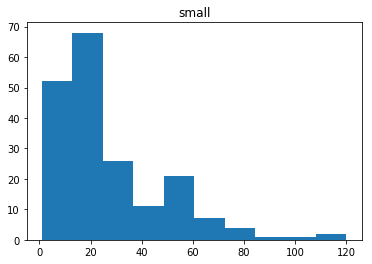

In [127]:
for discount, i in discounts.items(): 
    plt.hist(i)
    plt.title(discount)
    plt.show()


In [128]:
for i in discounts.keys():
    print(i,'average quantity puchased:',discounts[i].mean())

0% average quantity puchased: 21.715261958997722
10% average quantity puchased: 25.23699421965318
15% average quantity puchased: 28.38216560509554
20% average quantity puchased: 27.024844720496894
25% average quantity puchased: 28.24025974025974
all average quantity puchased: 27.10978520286396
small average quantity puchased: 26.922279792746114


Text(0.5, 1.0, 'Average Quantity Sold by Discount')

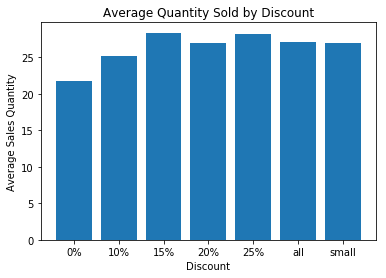

In [129]:
list_avg = []
for i in discounts.keys(): 
    list_avg.append(discounts[i].mean())

list_perc = list(discounts.keys())
plt.bar(list_perc,list_avg)
plt.xlabel('Discount')
plt.ylabel('Average Sales Quantity')
plt.title('Average Quantity Sold by Discount')

To make things simpler going forward, I am writing a loop to make dataframes for the rest of the tables in the Northwind database. The dataframes can be called by 'df[table_name]'.

In [18]:
#create a loop to make a dataframe for each table
df={}
for table_name in table_names:
    df[table_name] = pd.read_sql_query('''SELECT * FROM [{}]'''.format(table_name),con)

2019-04-12 04:02:07,042 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Category]
2019-04-12 04:02:07,046 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,051 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Customer]
2019-04-12 04:02:07,052 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,061 INFO sqlalchemy.engine.base.Engine SELECT * FROM [CustomerCustomerDemo]
2019-04-12 04:02:07,062 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,074 INFO sqlalchemy.engine.base.Engine SELECT * FROM [CustomerDemographic]
2019-04-12 04:02:07,075 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,084 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Employee]
2019-04-12 04:02:07,085 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,093 INFO sqlalchemy.engine.base.Engine SELECT * FROM [EmployeeTerritory]
2019-04-12 04:02:07,097 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:07,103 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Order]
2019-04-12 

## 2. Is there statistical significance in the sales revenue generated by each employee?

**Null**: The mean sales of products for each employee is not statistically different from the average sales of products for all employees

**Alternative**: The mean sales of products for each employee is statistically different from the average sales of products for all employees

In [19]:
df['Employee']

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


There are 9 employees, but only some of them are sales representatives. Qualitatively, that skews our analysis already.

In [20]:
df1 = pd.read_sql_query('SELECT * FROM [OrderDetail] LEFT JOIN [Order] ON [Order].Id = OrderDetail.OrderId \
                        INNER JOIN [Employee] ON [Employee].Id = [Order].EmployeeId \
                        WHERE [Employee].Title = "Sales Representative"',engine)
df1.head()

2019-04-12 04:02:07,433 INFO sqlalchemy.engine.base.Engine SELECT * FROM [OrderDetail] LEFT JOIN [Order] ON [Order].Id = OrderDetail.OrderId                         INNER JOIN [Employee] ON [Employee].Id = [Order].EmployeeId                         WHERE [Employee].Title = "Sales Representative"
2019-04-12 04:02:07,435 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,CustomerId,EmployeeId,OrderDate,...,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,10249/14,10249,14,18.6,9,0.00,10249,TOMSP,6,2012-07-05,...,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5,http://accweb/emmployees/davolio.bmp
1,10249/51,10249,51,42.4,40,0.00,10249,TOMSP,6,2012-07-05,...,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5,http://accweb/emmployees/davolio.bmp
2,10250/41,10250,41,7.7,10,0.00,10250,HANAR,4,2012-07-08,...,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp
3,10250/51,10250,51,42.4,35,0.15,10250,HANAR,4,2012-07-08,...,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp
4,10250/65,10250,65,16.8,15,0.15,10250,HANAR,4,2012-07-08,...,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp


In [21]:
df1['Sales'] = df1.UnitPrice * df1.Quantity * (1-df1.Discount)

In [22]:
df1.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,CustomerId,EmployeeId,OrderDate,...,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath,Sales
0,10249/14,10249,14,18.6,9,0.00,10249,TOMSP,6,2012-07-05,...,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5,http://accweb/emmployees/davolio.bmp,167.4
1,10249/51,10249,51,42.4,40,0.00,10249,TOMSP,6,2012-07-05,...,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5,http://accweb/emmployees/davolio.bmp,1696.0
2,10250/41,10250,41,7.7,10,0.00,10250,HANAR,4,2012-07-08,...,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp,77.0
3,10250/51,10250,51,42.4,35,0.15,10250,HANAR,4,2012-07-08,...,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp,1261.4
4,10250/65,10250,65,16.8,15,0.15,10250,HANAR,4,2012-07-08,...,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2,http://accweb/emmployees/peacock.bmp,214.2


In [23]:
df1.columns

Index(['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount', 'Id',
       'CustomerId', 'EmployeeId', 'OrderDate', 'RequiredDate', 'ShippedDate',
       'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity',
       'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'Id', 'LastName',
       'FirstName', 'Title', 'TitleOfCourtesy', 'BirthDate', 'HireDate',
       'Address', 'City', 'Region', 'PostalCode', 'Country', 'HomePhone',
       'Extension', 'Photo', 'Notes', 'ReportsTo', 'PhotoPath', 'Sales'],
      dtype='object')

In [24]:
emp = list(df1.EmployeeId.unique())
emp

[6, 4, 3, 9, 1, 7]

([<matplotlib.axis.XTick at 0x1c28e5d630>,
 <a list of 6 Text xticklabel objects>)

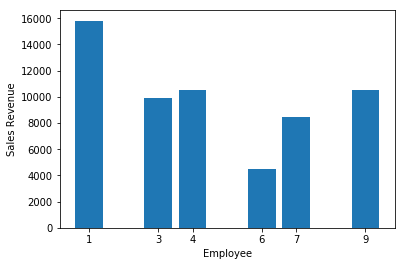

In [147]:
plt.bar(df1.EmployeeId,df1.Sales)
plt.xlabel('Employee')
plt.ylabel('Sales Revenue')
plt.xticks(emp)

In [146]:
# loop calculating average
emp_dict = dict()
for i in emp:
    emp_dict[i] = None
    x = df1.Sales[df1.EmployeeId==i]
    emp_dict[i] = x
emp_dict['Total']=df1.Sales #set total
for i in emp_dict.keys():
    print(i,'Mean Sales:',emp_dict[i].mean())

6 Mean Sales: 439.95910416666675
4 Mean Sales: 554.5020142857143
3 Mean Sales: 631.8157102803739
9 Mean Sales: 722.5052943925234
1 Mean Sales: 556.833636231884
7 Mean Sales: 707.7740625
Total Mean Sales: 587.8989749512036


In [27]:
# loop to compare each employee to total in t-test
for keys in emp_dict.keys():
    print(keys,':',stats.ttest_ind(emp_dict[keys], emp_dict['Total']))

6 : Ttest_indResult(statistic=-1.9164035565214501, pvalue=0.05548096923153411)
4 : Ttest_indResult(statistic=-0.6353863210891386, pvalue=0.5252508482568392)
3 : Ttest_indResult(statistic=0.7227924487654898, pvalue=0.4698984747578113)
9 : Ttest_indResult(statistic=1.3336491905251848, pvalue=0.18250381773194704)
1 : Ttest_indResult(statistic=-0.523392205082817, pvalue=0.6007630320813468)
7 : Ttest_indResult(statistic=1.4949067019847, pvalue=0.13512319433797781)
Total : Ttest_indResult(statistic=0.0, pvalue=1.0)


##### **Conclusion**: Because the p-values for each sales rep is greater than our alpha of 0.05, we conclude there is no statistical significance in each sales rep's sales compared to the total.

## 3. Do imported goods affect sales price?

**Null**: The sales price between the imported goods and domestic goods is not statistically significant.

**Alternative**: The sales price between the imported goods and domestic goods is statistically significant.

In [28]:
goods = pd.read_sql_query('''SELECT [Order].Id order_id,
                                    [Order].CustomerId customer_id,
                                    OrderDetail.ProductId product_id,
                                    OrderDetail.Quantity order_quantity,
                                    OrderDetail.UnitPrice unit_price,
                                    Customer.Country customer_country,
                                    Customer.Region customer_region,
                                    Supplier.Country supplier_country,
                                    Supplier.Region supplier_region
                             FROM Supplier
                             JOIN Product ON Supplier.Id = Product.SupplierId
                             JOIN OrderDetail ON Product.Id = OrderDetail.ProductId
                             JOIN [Order] ON OrderDetail.OrderId = [Order].Id
                             JOIN Customer ON [Order].CustomerId = Customer.Id;''', engine)
goods.head()

2019-04-12 04:02:13,673 INFO sqlalchemy.engine.base.Engine SELECT [Order].Id order_id,
                                    [Order].CustomerId customer_id,
                                    OrderDetail.ProductId product_id,
                                    OrderDetail.Quantity order_quantity,
                                    OrderDetail.UnitPrice unit_price,
                                    Customer.Country customer_country,
                                    Customer.Region customer_region,
                                    Supplier.Country supplier_country,
                                    Supplier.Region supplier_region
                             FROM Supplier
                             JOIN Product ON Supplier.Id = Product.SupplierId
                             JOIN OrderDetail ON Product.Id = OrderDetail.ProductId
                             JOIN [Order] ON OrderDetail.OrderId = [Order].Id
                             JOIN Customer ON [Order].CustomerId = Cus

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region
0,10248,VINET,11,12,14.0,France,Western Europe,Spain,Southern Europe
1,10248,VINET,42,10,9.8,France,Western Europe,Singapore,South-East Asia
2,10248,VINET,72,5,34.8,France,Western Europe,Italy,Southern Europe
3,10249,TOMSP,14,9,18.6,Germany,Western Europe,Japan,Eastern Asia
4,10249,TOMSP,51,40,42.4,Germany,Western Europe,Australia,NSW


In [29]:
print(goods.customer_region.unique())
print(goods.supplier_region.unique())

['Western Europe' 'South America' 'Central America' 'North America'
 'Northern Europe' 'Scandinavia' 'Southern Europe' 'British Isles'
 'Eastern Europe']
['Southern Europe' 'South-East Asia' 'Eastern Asia' 'NSW' 'North America'
 'Northern Europe' 'British Isles' 'Scandinavia' 'Western Europe'
 'South America' 'Victoria']


In [30]:
#create a dictionary for combining regions
regions_dict = {'Western Europe':'Europe','Southern Europe':'Europe','Northern Europe':'Europe',
           'Eastern Europe':'Europe', 'North America':'North America', 'South America':'South America',
           'British Isles':'British Isles', 'Scandinavia':'Scandinavia', 'Central America':'Central America',
           'NSW':'NSW', 'Victoria':'Victoria', 'Eastern Asia':'East Asia', 'South-East Asia':'South-East Asia'}
goods['customer_region'] = goods['customer_region'].map(regions_dict)
goods['supplier_region'] = goods['supplier_region'].map(regions_dict)
goods.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region
0,10248,VINET,11,12,14.0,France,Europe,Spain,Europe
1,10248,VINET,42,10,9.8,France,Europe,Singapore,South-East Asia
2,10248,VINET,72,5,34.8,France,Europe,Italy,Europe
3,10249,TOMSP,14,9,18.6,Germany,Europe,Japan,East Asia
4,10249,TOMSP,51,40,42.4,Germany,Europe,Australia,NSW


In [31]:
# Feature Engineering!!
goods['imported'] = np.where(goods['customer_region'] == goods['supplier_region'], 0, 1)
goods['imported'].value_counts()

1    1560
0     518
Name: imported, dtype: int64

In [32]:
goods['revenue'] = goods.order_quantity * goods.unit_price
goods.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region,imported,revenue
0,10248,VINET,11,12,14.0,France,Europe,Spain,Europe,0,168.0
1,10248,VINET,42,10,9.8,France,Europe,Singapore,South-East Asia,1,98.0
2,10248,VINET,72,5,34.8,France,Europe,Italy,Europe,0,174.0
3,10249,TOMSP,14,9,18.6,Germany,Europe,Japan,East Asia,1,167.4
4,10249,TOMSP,51,40,42.4,Germany,Europe,Australia,NSW,1,1696.0


In [33]:
goods['domestic_revenue'] = np.where(goods.imported == 0, (goods.order_quantity * goods.unit_price), 0.0)
goods['foreign_revenue'] = np.where(goods.imported == 1, (goods.order_quantity * goods.unit_price), 0.0)
goods.head()

,order_id,customer_id,product_id,order_quantity,unit_price,customer_country,customer_region,supplier_country,supplier_region,imported,revenue,domestic_revenue,foreign_revenue
0,10248,VINET,11,12,14.0,France,Europe,Spain,Europe,0,168.0,168.0,0.0
1,10248,VINET,42,10,9.8,France,Europe,Singapore,South-East Asia,1,98.0,0.0,98.0
2,10248,VINET,72,5,34.8,France,Europe,Italy,Europe,0,174.0,174.0,0.0
3,10249,TOMSP,14,9,18.6,Germany,Europe,Japan,East Asia,1,167.4,0.0,167.4
4,10249,TOMSP,51,40,42.4,Germany,Europe,Australia,NSW,1,1696.0,0.0,1696.0


In [163]:
# group by customer id
pd.options.display.float_format = '{:,.2f}'.format
goods2 = goods[['customer_id', 'revenue', 'domestic_revenue', 'foreign_revenue']]
goods2 = goods2.groupby('customer_id').sum()
goods2.head(10)

,revenue,domestic_revenue,foreign_revenue
customer_id,,,
ALFKI,"4,596.20","2,558.20","2,038.00"
ANATR,"1,402.95",0.00,"1,402.95"
AROUT,"13,806.50","4,335.00","9,471.50"
BERGS,"26,968.15","13,974.10","12,994.05"
BLAUS,"3,239.80","1,445.80","1,794.00"
BLONP,"19,088.00","13,045.80","6,042.20"
BOLID,"5,297.80","3,035.40","2,262.40"
BONAP,"23,850.95","5,193.10","18,657.85"
BOTTM,"22,607.70","7,536.80","15,070.90"


In [35]:
stats.levene(goods2['domestic_revenue'], goods2['foreign_revenue'])

LeveneResult(statistic=4.231747828460365, pvalue=0.041220293696941995)

In [36]:
stats.ttest_ind(goods2['domestic_revenue'], goods2['foreign_revenue'], equal_var = False)

Ttest_indResult(statistic=-2.9756718793666415, pvalue=0.0034331287209264576)

**Conclusion**: There is a significant difference between how much customers spend on domestic and foreign products.

## 4. Do the number of items in stock for each product affect sales price?
**Null**: There is not a statistical difference in sales price between items low in stock versus not low in stock.

**Alternative**: There is a statistical difference in sales price between items low in stock versus not low in stock.

Since 'low in stock' may be subjective, let's take another look at the products table.

In [37]:
df['Product'].head(10)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0


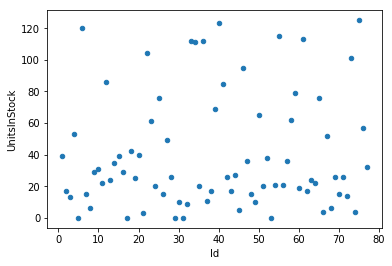

In [38]:
df['Product'].plot.scatter(x='Id',y='UnitsInStock')

In [39]:
low_stock = df['Product'].loc[df['Product']['UnitsInStock'] < 40]
high_stock = df['Product'].loc[df['Product']['UnitsInStock'] >= 40] 
low_mu = np.mean(low_stock)
high_mu = np.mean(high_stock)
mu = np.mean(df['Product'])
print(low_mu)
print(high_mu)
print(mu)

Id              38.000000
SupplierId      12.921569
CategoryId       4.078431
UnitPrice       31.371765
UnitsInStock    18.352941
UnitsOnOrder    15.294118
ReorderLevel    11.176471
Discontinued     0.156863
dtype: float64
Id              40.961538
SupplierId      15.076923
CategoryId       4.192308
UnitPrice       23.951923
UnitsInStock    83.961538
UnitsOnOrder     0.000000
ReorderLevel    15.000000
Discontinued     0.000000
dtype: float64
Id              39.000000
SupplierId      13.649351
CategoryId       4.116883
UnitPrice       28.866364
UnitsInStock    40.506494
UnitsOnOrder    10.129870
ReorderLevel    12.467532
Discontinued     0.103896
dtype: float64


In [40]:
# create two categories for t-test, average of all units in stock is about 40
low=con.execute('SELECT UnitPrice FROM Product WHERE UnitsInStock < 40.').fetchall()
high=con.execute('SELECT UnitPrice FROM Product WHERE UnitsInStock >= 40.').fetchall()

2019-04-12 04:02:14,421 INFO sqlalchemy.engine.base.Engine SELECT UnitPrice FROM Product WHERE UnitsInStock < 40.
2019-04-12 04:02:14,425 INFO sqlalchemy.engine.base.Engine ()
2019-04-12 04:02:14,429 INFO sqlalchemy.engine.base.Engine SELECT UnitPrice FROM Product WHERE UnitsInStock >= 40.
2019-04-12 04:02:14,431 INFO sqlalchemy.engine.base.Engine ()


In [41]:
print(stats.ttest_ind(low, high, equal_var=False))
#print("Cohen's d: ",cohen_d(np.array(low),np.array(high)))

Ttest_indResult(statistic=array([1.12840319]), pvalue=array([0.26276906]))


**Conclusion**: We conclude that there is not a difference in price for units in low stock or high stock.